<a href="https://colab.research.google.com/github/pusane/AM_in_Python/blob/master/AmplitudeModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Amplitude Modulation and Demodulation using Python**

Start by installing the non-default libraries

In [0]:
#!pip install -q sounddevice scipy
#!apt-get -qq install libportaudio2

Now we would like to import the relevant libraries (notice the shorthands we define for convenience)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write

Define carrier properties


In [0]:
# carrier signal properties
carrier_amplitude = 1
carrier_frequency = 4000.0 #Hz

# modulation property
modulation_index = 1

# initialize the time vector
sampling_frequency = 44100 #Hz
time = np.arange(signal_duration*sampling_frequency) / sampling_frequency

# calculate the carrier signal
carrier = carrier_amplitude*np.cos(2*np.pi*carrier_frequency*time)  

Define message source

In [0]:
# message signal properties
message_frequency = 40.0 #Hz
message_bandwidth = 60 #sHz
message_amplitude = 1
signal_duration = 1 #seconds

# calculate the message signal
message = message_amplitude*np.cos(2*np.pi*message_frequency*time)


Plot the message and modulated signals

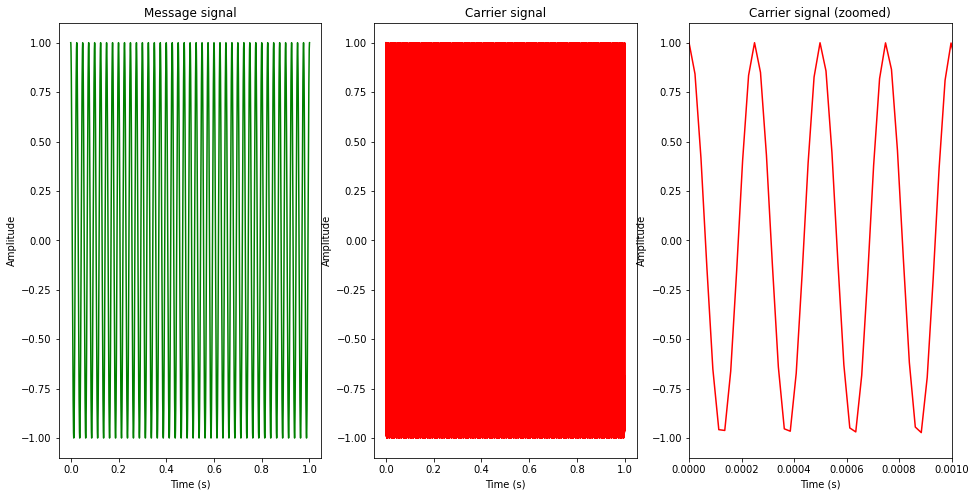

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(time,message,'g')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Message signal')

plt.subplot(1,3,2)
plt.plot(time,carrier, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal')

plt.subplot(1,3,3)
plt.plot(time,carrier, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Carrier signal (zoomed)')
plt.axis([0, 0.001, -1.1, 1.1])

plt.show()

Modulation step

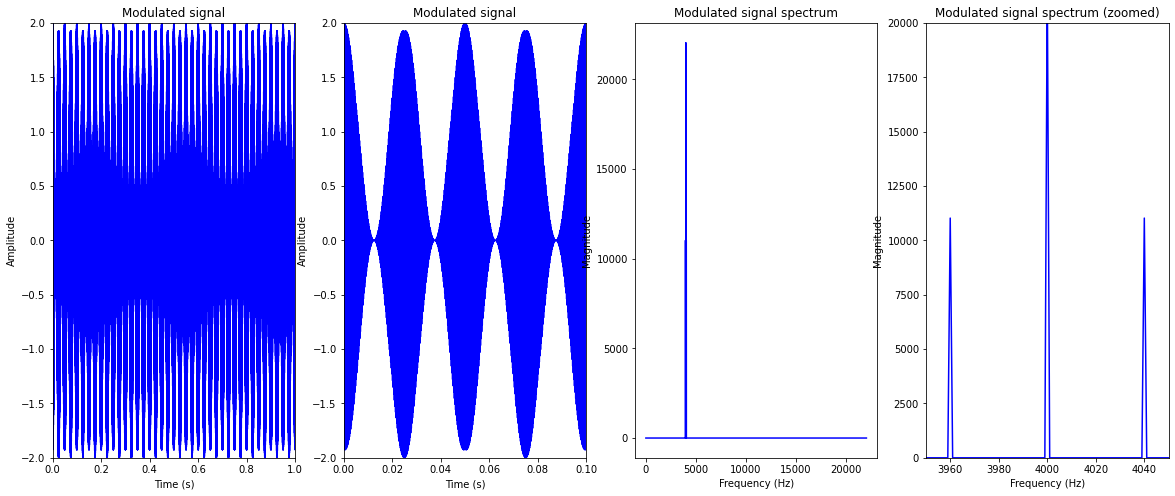

In [24]:
# initialize the array for the modulated signal
max_message_amplitude = max(abs(message))
modulated = np.zeros_like(message)
for i, t in enumerate(time):
    modulated[i] = carrier_amplitude*(1+modulation_index*message[i]/max_message_amplitude)*np.cos(2*np.pi*carrier_frequency*t)

modulated_in_frequency = np.fft.rfft(modulated)
modulated_in_frequency_indices = np.fft.rfftfreq(modulated.size, 1/sampling_frequency)

# plot the obtained signal in both time and frequency
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.plot(time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Modulated signal')
plt.axis([0, 1, -2, 2])

plt.subplot(1,4,2)
plt.plot(time, modulated, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Modulated signal')
plt.axis([0, 0.1, -2, 2])

plt.subplot(1,4,3)
plt.plot(modulated_in_frequency_indices, abs(modulated_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Modulated signal spectrum')

plt.subplot(1,4,4)
plt.plot(modulated_in_frequency_indices, abs(modulated_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Modulated signal spectrum (zoomed)')
plt.axis([3950, 4050, 0, 20000])

plt.show()


Demodulation step

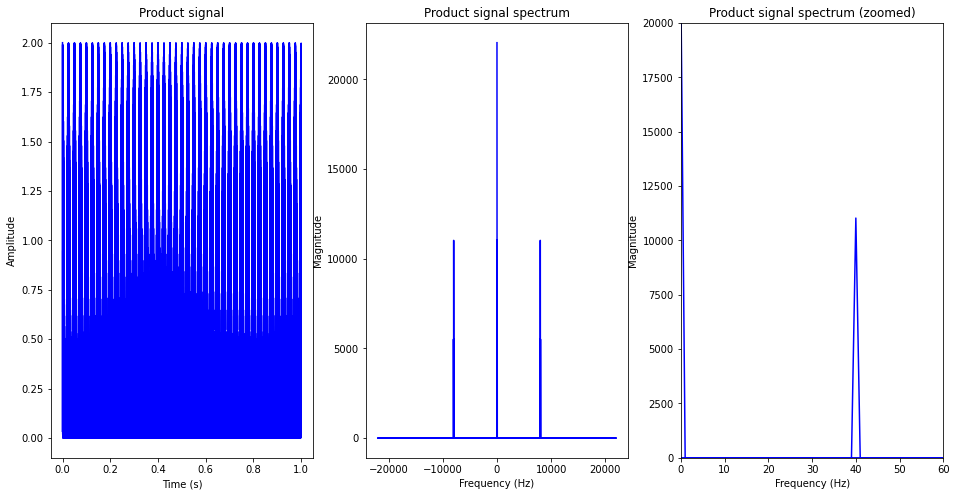

In [27]:
# initialize the array for the product signal
product = np.zeros_like(message)
for i, t in enumerate(time):
    product[i] = modulated[i]*np.cos(2*np.pi*carrier_frequency*t)

product_in_frequency = np.fft.fft(product)
product_in_frequency_indices = np.fft.fftfreq(product.size, 1/sampling_frequency)

# plot the obtained signal in both time and frequency
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.plot(time, product, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Product signal')

plt.subplot(1,3,2)
plt.plot(product_in_frequency_indices, abs(product_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Product signal spectrum')

plt.subplot(1,3,3)
plt.plot(product_in_frequency_indices, abs(product_in_frequency), 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Product signal spectrum (zoomed)')
plt.axis([0, 60, 0, 20000])

plt.show()

Text(0.5, 1.0, 'Demodulated message signal')

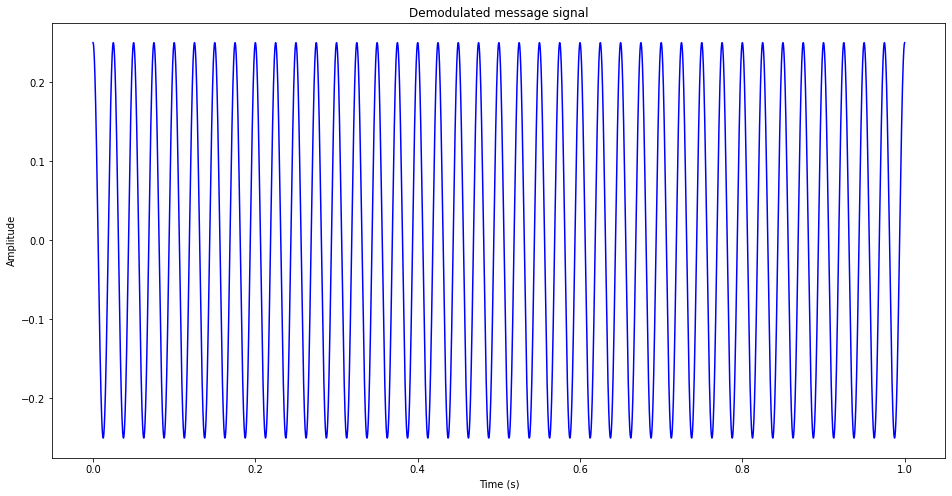

In [29]:
# now use an LPF to filter out the message
filtered_output_in_frequency = np.zeros_like(product_in_frequency)
for i in range(round(product_in_frequency.size/(sampling_frequency/2)*message_bandwidth)):
    filtered_output_in_frequency[i] = product_in_frequency[i]

filtered_output = np.fft.ifft(filtered_output_in_frequency)

# also filter out the DC component
filtered_output -= filtered_output.mean()

plt.figure(figsize=(16,8))
plt.plot(time,filtered_output.real, 'b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Demodulated message signal')